# Apple Jackfruit Dataset

Dataset Credits:
- Fruits Detection > Fruits-Apple-v1
  - https://universe.roboflow.com/ron-xmba6/fruits-detection-hrhn3
- Jackfruit > 2023-04-10 11:58am
  - https://universe.roboflow.com/vietnam-fruit-in-lab/jackfruit-maj1o


 Dataset can be accessed here: https://iitgnacin-my.sharepoint.com/:u:/g/personal/22110103_iitgn_ac_in/ETOx7WAgqltAuhVpPSBEMaYB3ckKLDtF4t0s5Bxd3CLX5A?e=teupL5
## VGG 1

In [23]:
# Loading the dataset

import zipfile
with zipfile.ZipFile("Dataset.zip","r") as zip_ref:
    zip_ref.extractall("FinalDS")

In [24]:
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG model with one block
def create_vgg1_model():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layer
    x = Dense(128, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
vgg_model_1_block = create_vgg1_model()

# Compile the model
vgg_model_1_block.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model_1_block.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize_2 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 802816)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               1027

In [26]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=1,
    class_mode='binary'
)

test_generator1 = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=40,
    class_mode='binary'
)

# Train the model
history = vgg_model_1_block.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 2s 63ms/step - loss: 11.9744 - accuracy: 0.7625 - val_loss: 1.1248 - val_accuracy: 0.8000
Epoch 2/5
20/20 [==============================] - 1s 52ms/step - loss: 0.2613 - accuracy: 0.9688 - val_loss: 1.1004e-06 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 1s 56ms/step - loss: 5.1895e-04 - accuracy: 1.0000 - val_loss: 1.2823e-06 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 1s 49ms/step - loss: 2.0795e-05 - accuracy: 1.0000 - val_loss: 1.0538e-06 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 1s 50ms/step - loss: 1.3792e-05 - accuracy: 1.0000 - val_loss: 1.0288e-06 - val_accuracy: 1.0000
Time taken: 8.037335872650146 seconds


Text(0.5, 0, 'Epoch')

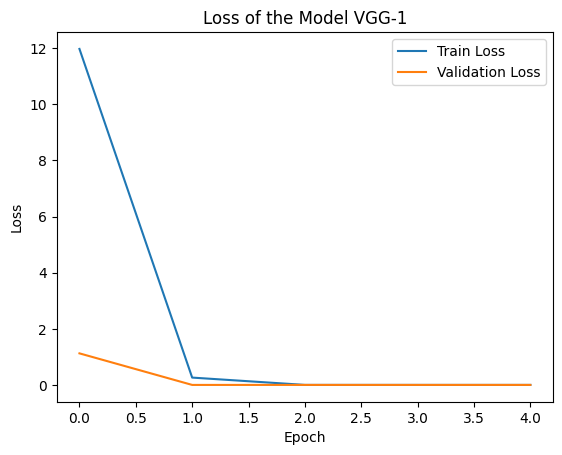

In [27]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-1')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

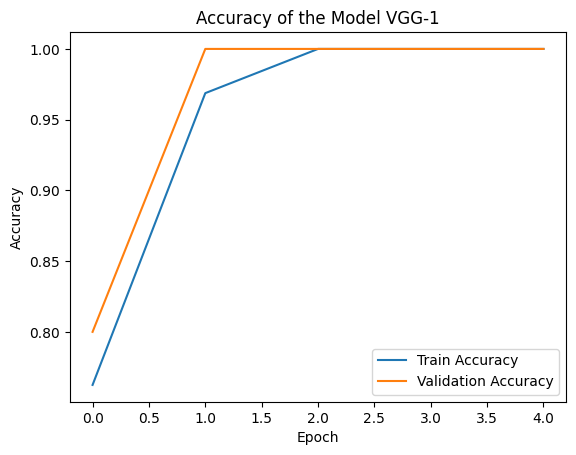

In [28]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [29]:
print("The Training Loss for the Model VGG 1")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 1")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 1")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 1")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 1
Epoch 1: 11.974418640136719
Epoch 2: 0.26129013299942017
Epoch 3: 0.0005189500516280532
Epoch 4: 2.0794908778043464e-05
Epoch 5: 1.3791815035801847e-05
The Validation Loss for the Model VGG 1
Epoch 1: 1.1247999668121338
Epoch 2: 1.1004342468368122e-06
Epoch 3: 1.282260882362607e-06
Epoch 4: 1.0537785328779137e-06
Epoch 5: 1.028779706757632e-06
The Training Accuracy for the Model VGG 1
Epoch 1: 0.762499988079071
Epoch 2: 0.96875
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0
The Validation Accuracy for the Model VGG 1
Epoch 1: 0.800000011920929
Epoch 2: 1.0
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [30]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_1_block.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

40/40 [==============================] - 0s 5ms/step - loss: 1.0288e-06 - accuracy: 1.0000
Test loss: 0.0000, Test accuracy: 1.0000


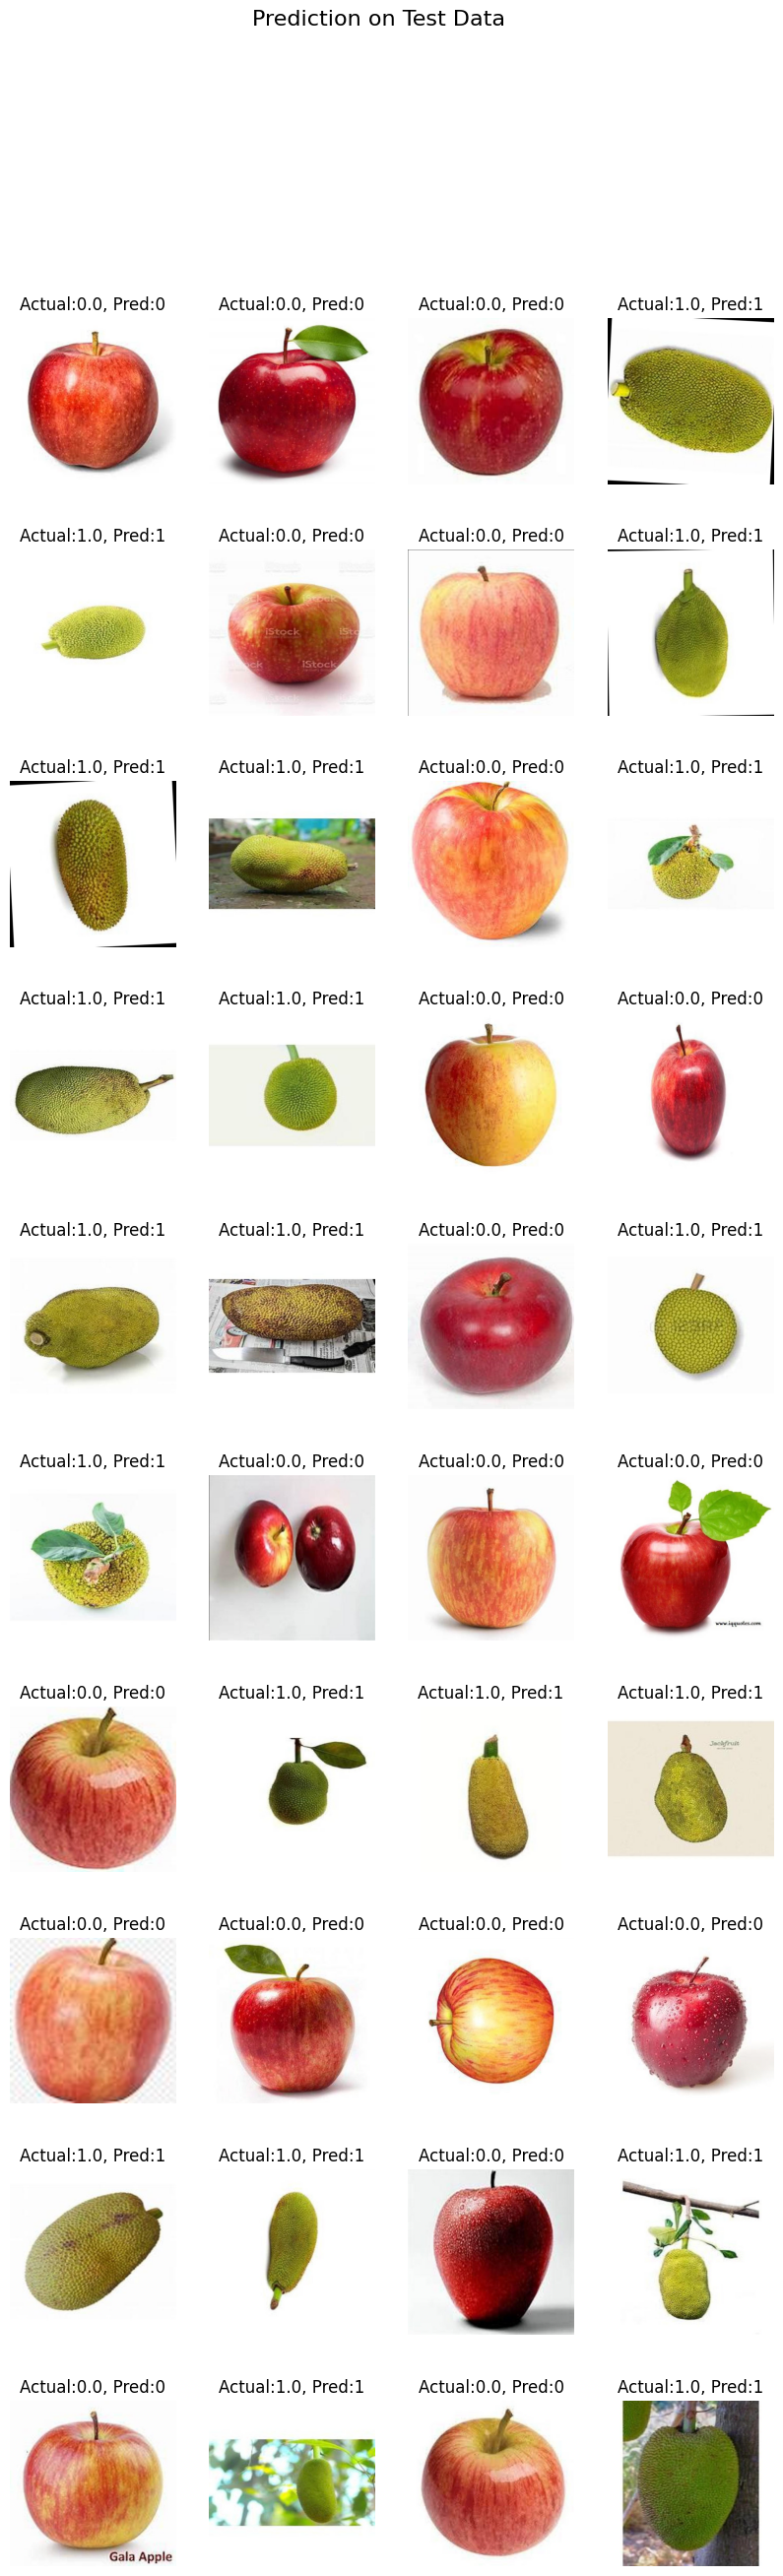

In [31]:
# Iterate through test data
imgctr = 0
for data, target in test_generator1:
    output = vgg_model_1_block(data)
    predicted_label = [1 if (op > 0.5) else 0 for op in output]  # Convert probability to binary prediction
    true_label = target

    # Convert tensor image to numpy array and reshape to (H, W, C)
    image = data.squeeze()
    fig, axarr = plt.subplots(10, 4, figsize=(10, 30))
    fig.suptitle("Prediction on Test Data", fontsize=16)

    for i in range(10):
      for j in range(4):
        axarr[i, j].imshow(image[i*4+j])
        axarr[i, j].set_title(f'Actual:{target[i*4+j]}, Pred:{predicted_label[i*4+j]}', fontsize=12)
        axarr[i, j].axis(False)

    plt.show()
    break

# VGG 3

In [32]:
# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG model with three blocks
def create_vgg_model_3_blocks():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layer
    x = Dense(128, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model with three blocks
vgg_model_3_blocks = create_vgg_model_3_blocks()

# Compile the model
vgg_model_3_blocks.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model_3_blocks.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize_3 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0   

In [33]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=1,
    class_mode='binary'
)

# Train the model
history = vgg_model_3_blocks.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 5s 85ms/step - loss: 1.0733 - accuracy: 0.8250 - val_loss: 0.1591 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 2s 77ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.7939 - val_accuracy: 0.8250
Epoch 3/5
20/20 [==============================] - 1s 71ms/step - loss: 0.0086 - accuracy: 0.9937 - val_loss: 2.3723e-05 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 2s 77ms/step - loss: 0.0373 - accuracy: 0.9875 - val_loss: 3.9737e-05 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 2s 107ms/step - loss: 0.0631 - accuracy: 0.9937 - val_loss: 0.0062 - val_accuracy: 1.0000
Time taken: 14.662426948547363 seconds


Text(0.5, 0, 'Epoch')

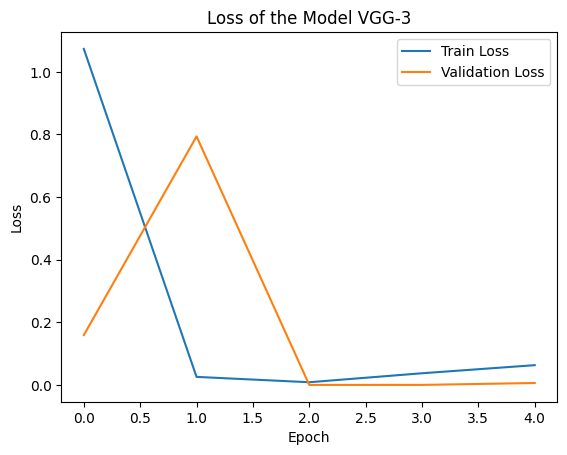

In [34]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-3')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

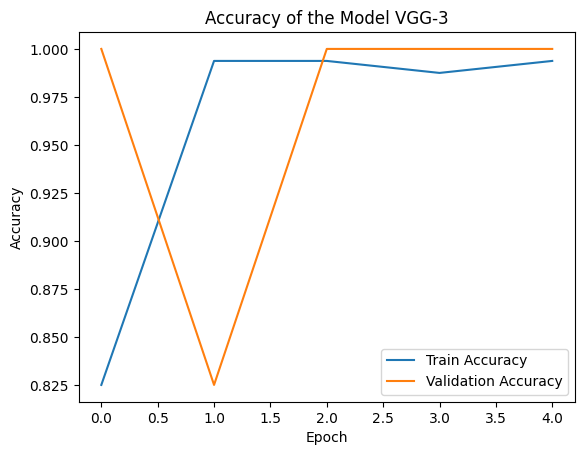

In [35]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [36]:
print("The Training Loss for the Model VGG 3")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 3")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 3")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 3")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 3
Epoch 1: 1.0733460187911987
Epoch 2: 0.025680696591734886
Epoch 3: 0.008591396734118462
Epoch 4: 0.03727960214018822
Epoch 5: 0.06313865631818771
The Validation Loss for the Model VGG 3
Epoch 1: 0.15913526713848114
Epoch 2: 0.7938544154167175
Epoch 3: 2.372309609199874e-05
Epoch 4: 3.973712955485098e-05
Epoch 5: 0.006193024106323719
The Training Accuracy for the Model VGG 3
Epoch 1: 0.824999988079071
Epoch 2: 0.9937499761581421
Epoch 3: 0.9937499761581421
Epoch 4: 0.987500011920929
Epoch 5: 0.9937499761581421
The Validation Accuracy for the Model VGG 3
Epoch 1: 1.0
Epoch 2: 0.824999988079071
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [37]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_3_blocks.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

40/40 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 1.0000
Test loss: 0.0062, Test accuracy: 1.0000


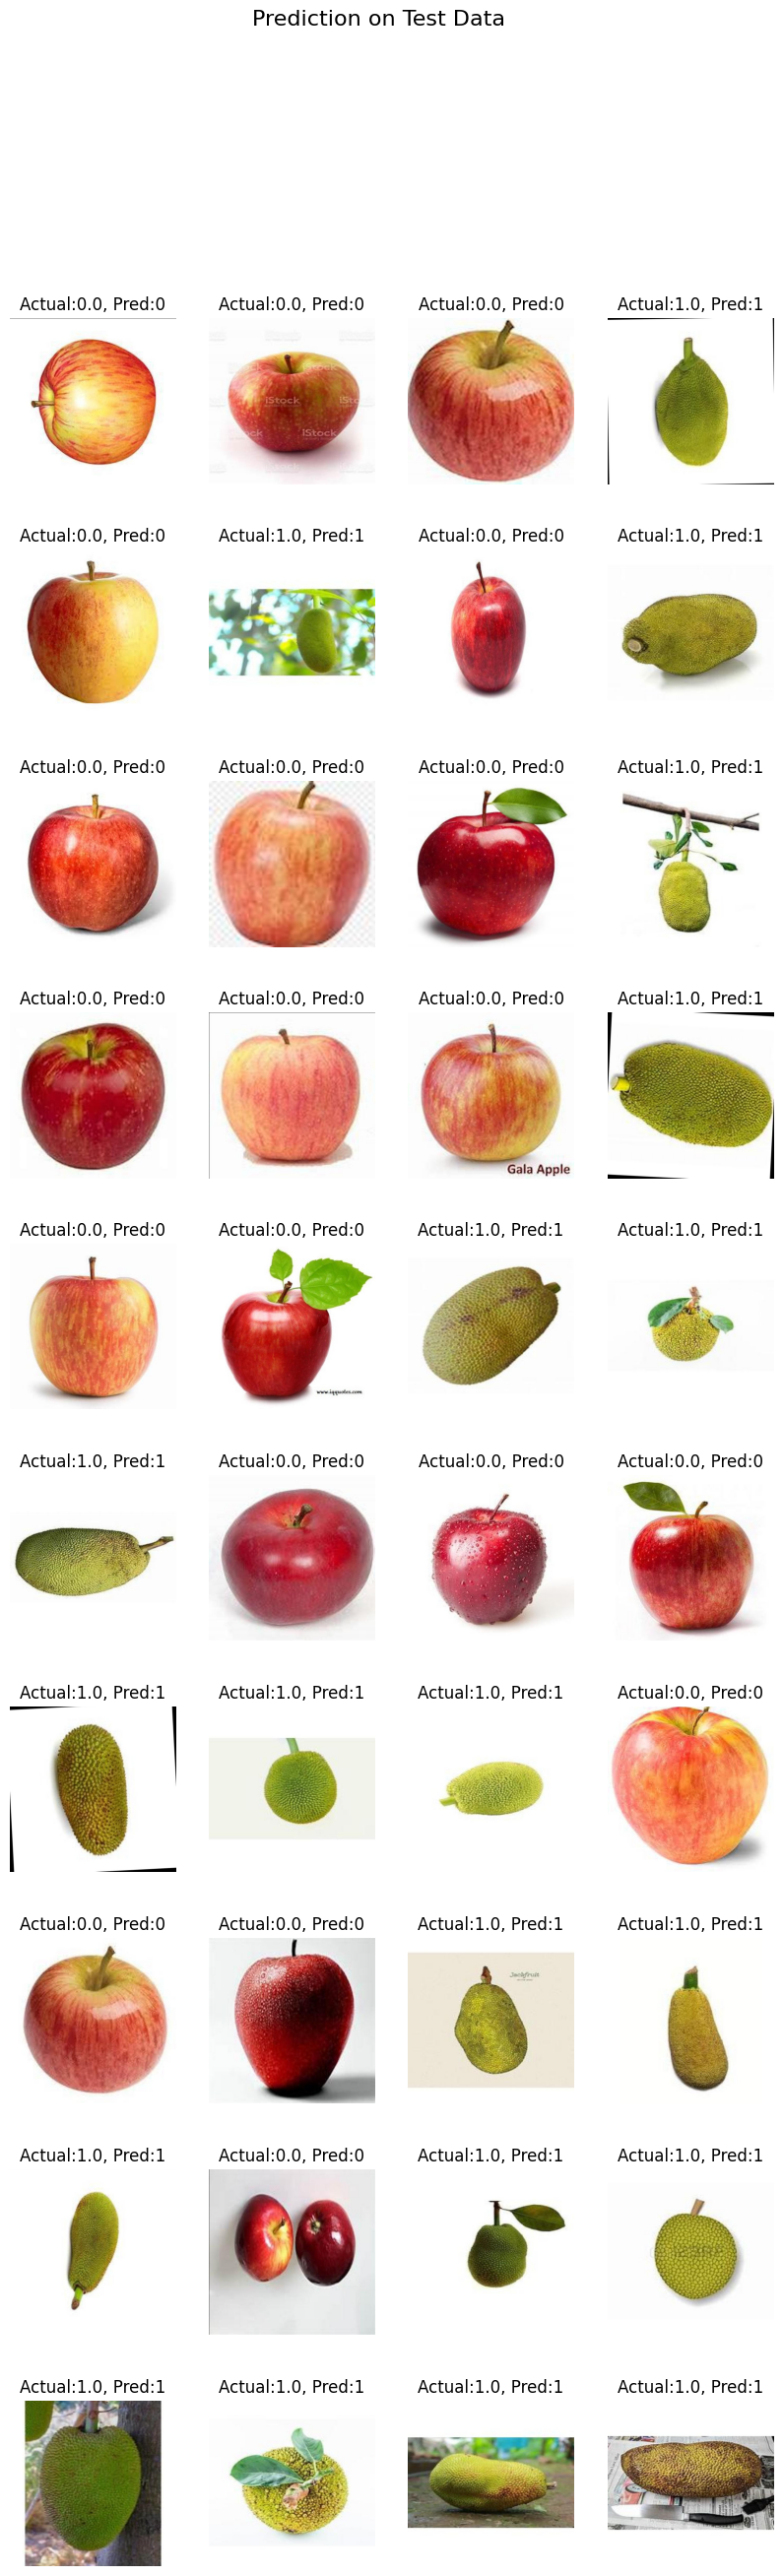

In [38]:
# Iterate through test data
imgctr = 0
for data, target in test_generator1:
    output = vgg_model_3_blocks(data)
    predicted_label = [1 if (op > 0.5) else 0 for op in output]  # Convert probability to binary prediction
    true_label = target

    # Convert tensor image to numpy array and reshape to (H, W, C)
    image = data.squeeze()
    fig, axarr = plt.subplots(10, 4, figsize=(10, 30))
    fig.suptitle("Prediction on Test Data", fontsize=16)

    for i in range(10):
      for j in range(4):
        axarr[i, j].imshow(image[i*4+j])
        axarr[i, j].set_title(f'Actual:{target[i*4+j]}, Pred:{predicted_label[i*4+j]}', fontsize=12)
        axarr[i, j].axis(False)

    plt.show()
    break

## Same VGG 3 Model with Data Augmentation

Data Augmented with:

  - rotation_range=90
  - width_shift_range=0.75
  - height_shift_range=0.75
  - shear_range=0.95
  - zoom_range=0.3
  - horizontal_flip=True
  - channel_shift_range=0.6
  - fill_mode='nearest'


In [45]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data augmentation for training data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.75,
    height_shift_range=0.75,
    shear_range=0.95,
    zoom_range=0.3,
    horizontal_flip=True,
    channel_shift_range=0.6,
    fill_mode='nearest'
)

# Define data generator for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load augmented training data
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator2 = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=40,
    class_mode='binary'
)

# Train the model with augmented data
history_augmented = vgg_model_3_blocks.fit(
    train_generator_augmented,
    steps_per_epoch=len(train_generator_augmented),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 5s 226ms/step - loss: 0.1397 - accuracy: 0.9625 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 3s 148ms/step - loss: 0.2737 - accuracy: 0.9688 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 3s 136ms/step - loss: 0.4297 - accuracy: 0.9438 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 3s 137ms/step - loss: 0.2891 - accuracy: 0.8875 - val_loss: 0.1848 - val_accuracy: 0.8500
Epoch 5/5
20/20 [==============================] - 4s 191ms/step - loss: 0.5116 - accuracy: 0.9062 - val_loss: 0.1597 - val_accuracy: 0.9750


Text(0.5, 0, 'Epoch')

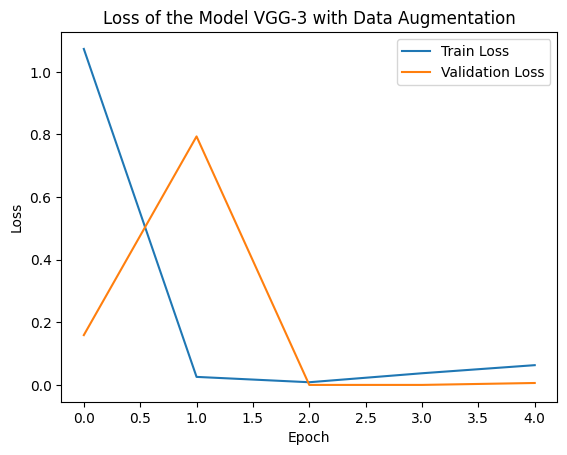

In [46]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-3 with Data Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

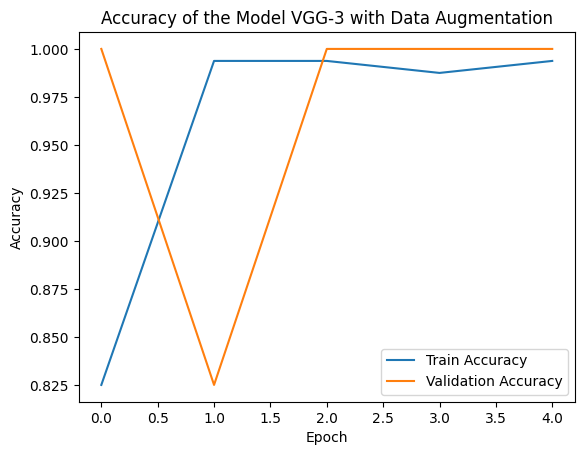

In [47]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-3 with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [48]:
print("The Training Loss for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 3 with Data Augmentation
Epoch 1: 1.0733460187911987
Epoch 2: 0.025680696591734886
Epoch 3: 0.008591396734118462
Epoch 4: 0.03727960214018822
Epoch 5: 0.06313865631818771
The Validation Loss for the Model VGG 3 with Data Augmentation
Epoch 1: 0.15913526713848114
Epoch 2: 0.7938544154167175
Epoch 3: 2.372309609199874e-05
Epoch 4: 3.973712955485098e-05
Epoch 5: 0.006193024106323719
The Training Accuracy for the Model VGG 3 with Data Augmentation
Epoch 1: 0.824999988079071
Epoch 2: 0.9937499761581421
Epoch 3: 0.9937499761581421
Epoch 4: 0.987500011920929
Epoch 5: 0.9937499761581421
The Validation Accuracy for the Model VGG 3 with Data Augmentation
Epoch 1: 1.0
Epoch 2: 0.824999988079071
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [49]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_3_blocks.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

40/40 [==============================] - 0s 5ms/step - loss: 0.1597 - accuracy: 0.9750
Test loss: 0.1597, Test accuracy: 0.9750


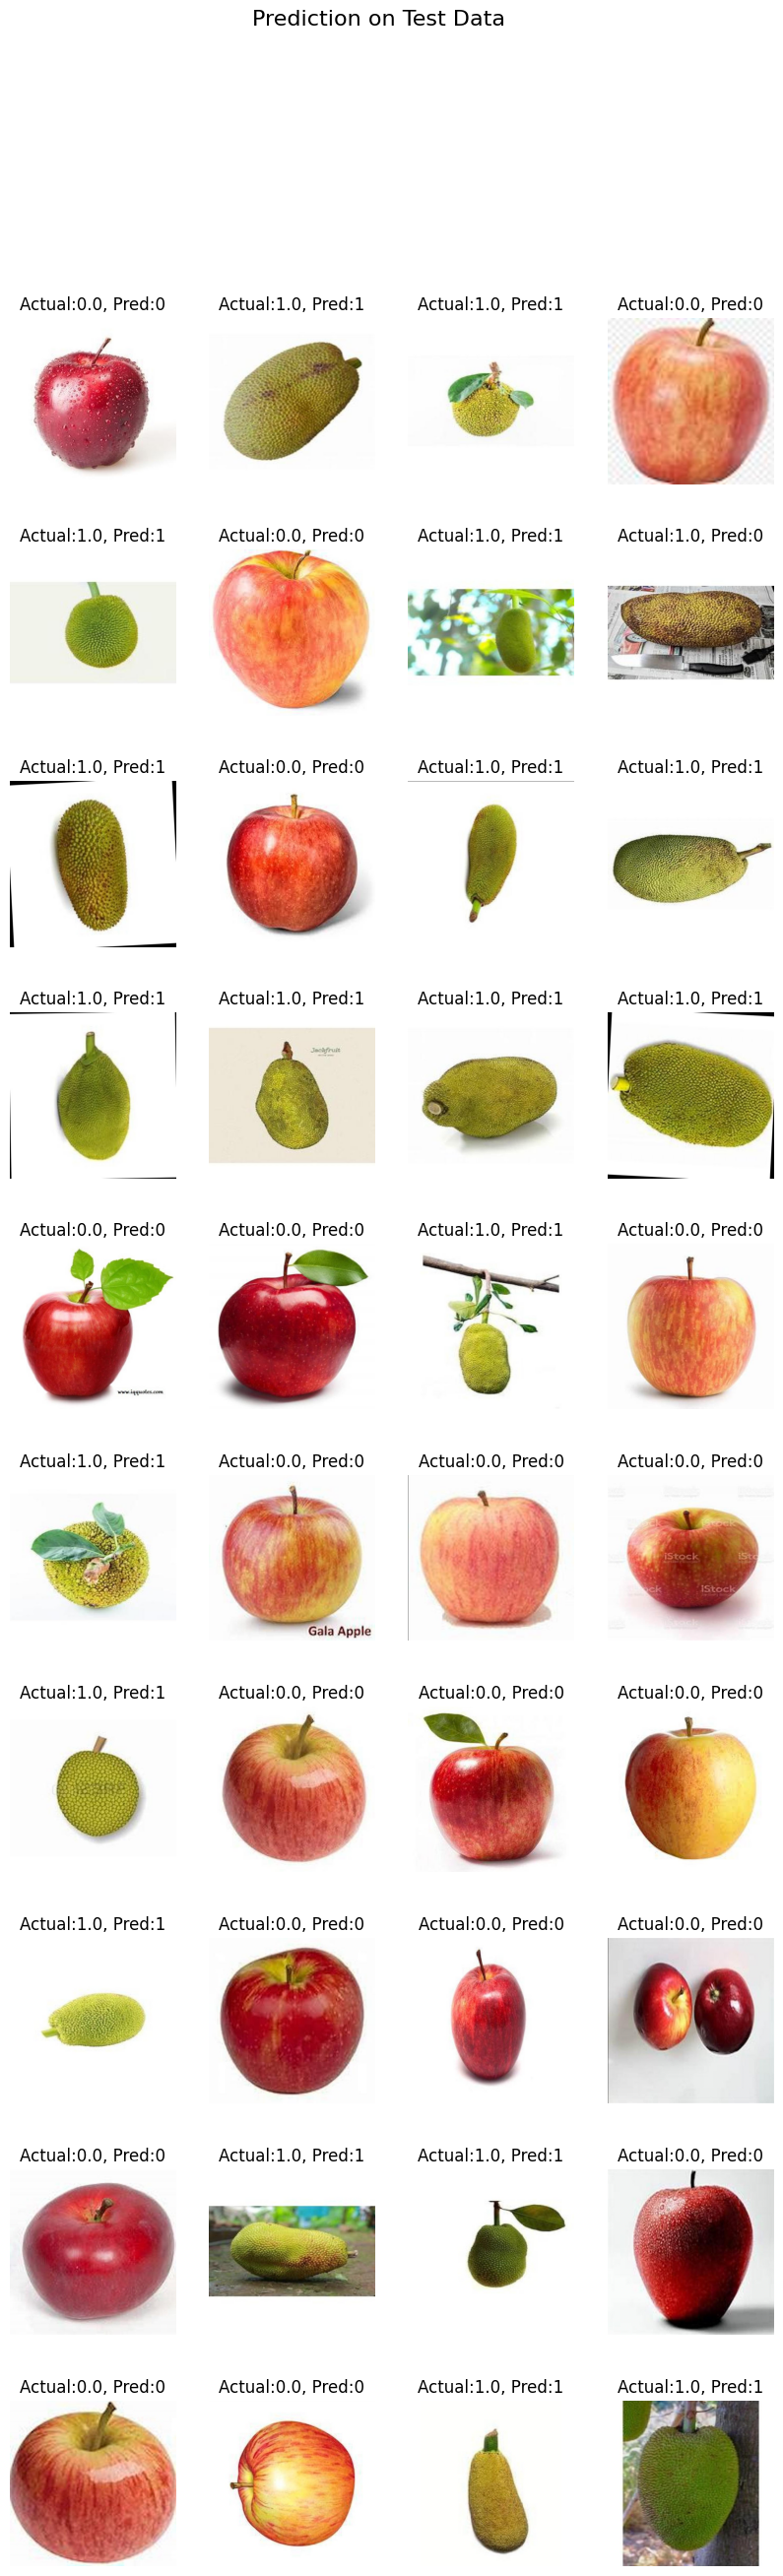

In [50]:
# Iterate through test data
imgctr = 0
for data, target in test_generator2:
    output = vgg_model_3_blocks(data)
    predicted_label = [1 if (op > 0.5) else 0 for op in output]  # Convert probability to binary prediction
    true_label = target

    # Convert tensor image to numpy array and reshape to (H, W, C)
    image = data.squeeze()
    fig, axarr = plt.subplots(10, 4, figsize=(10, 30))
    fig.suptitle("Prediction on Test Data", fontsize=16)

    for i in range(10):
      for j in range(4):
        axarr[i, j].imshow(image[i*4+j])
        axarr[i, j].set_title(f'Actual:{target[i*4+j]}, Pred:{predicted_label[i*4+j]}', fontsize=12)
        axarr[i, j].axis(False)

    plt.show()
    break

## VGG 16 with all layers trained

In [76]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG-16 model
def create_vgg16_model():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layers
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the VGG-16 model
vgg16_model = create_vgg16_model()

# Compile the model
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg16_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize_8 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_61 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 112, 112, 128)     7385

In [77]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='sparse'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=1,
    class_mode='sparse'
)

# Train the model
history = vgg16_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 13s 217ms/step - loss: 1.1191 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 4s 192ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.7323 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 4s 191ms/step - loss: 0.6985 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 4s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 4s 196ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Time taken: 40.261181354522705 seconds


Text(0.5, 0, 'Epoch')

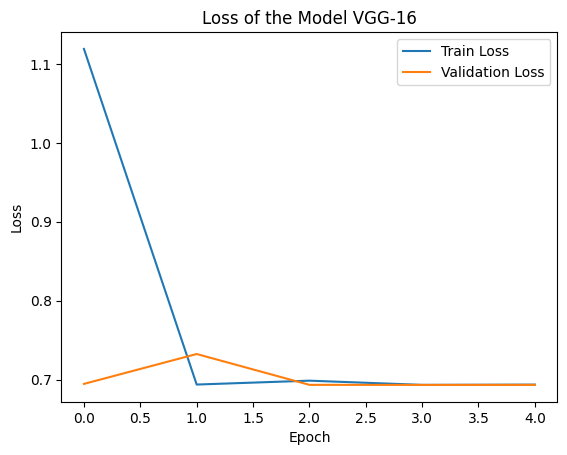

In [78]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-16')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

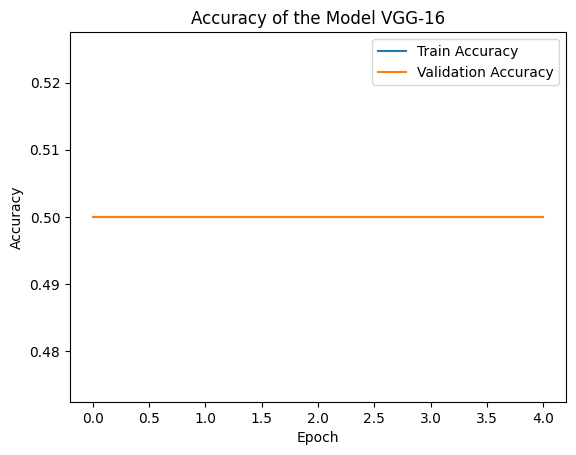

In [79]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [80]:
print("The Training Loss for the Model VGG 16")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 16")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 16")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 16")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 16
Epoch 1: 1.1191011667251587
Epoch 2: 0.6936233639717102
Epoch 3: 0.6985427141189575
Epoch 4: 0.693206787109375
Epoch 5: 0.693533718585968
The Validation Loss for the Model VGG 16
Epoch 1: 0.6944537162780762
Epoch 2: 0.7323405742645264
Epoch 3: 0.6932386159896851
Epoch 4: 0.6931486129760742
Epoch 5: 0.693213164806366
The Training Accuracy for the Model VGG 16
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5
The Validation Accuracy for the Model VGG 16
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5


In [81]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg16_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

40/40 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5000
Test loss: 0.6932, Test accuracy: 0.5000


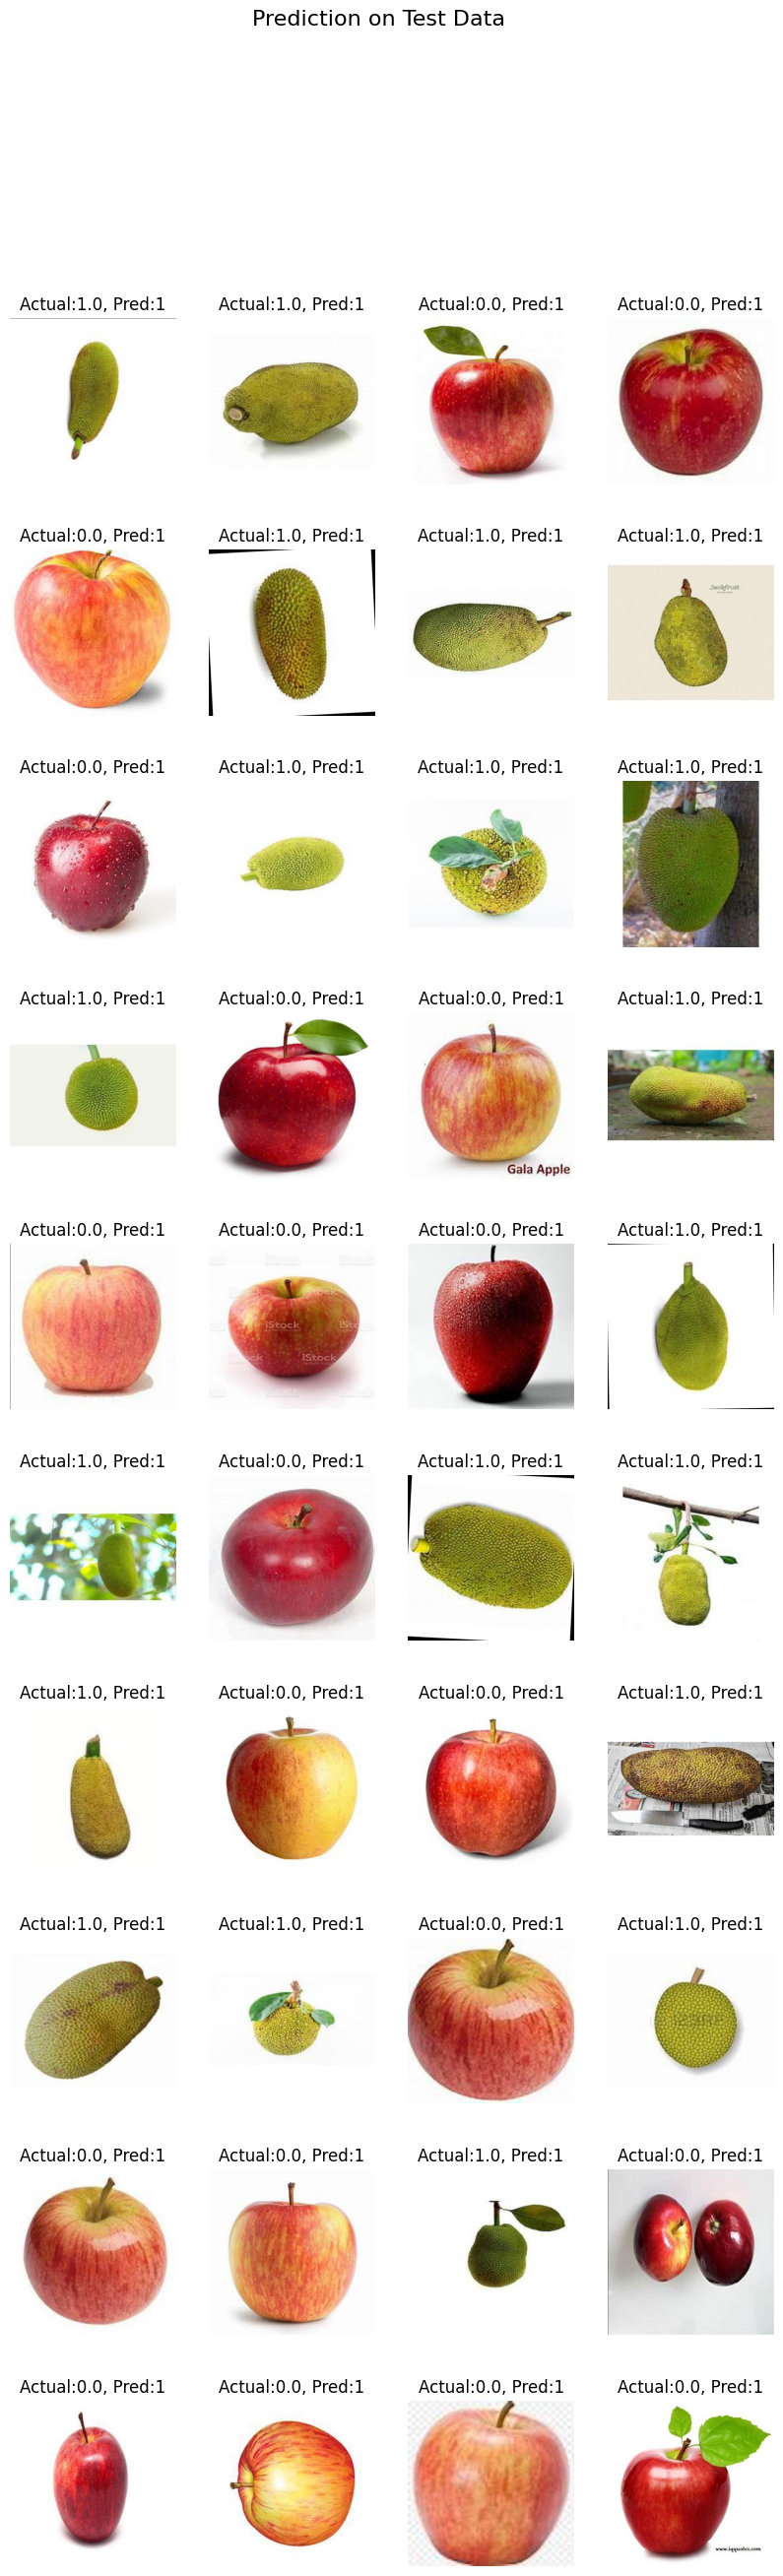

In [82]:
# Iterate through test data
imgctr = 0
for data, target in test_generator1:
    output = vgg16_model(data)
    predicted_label = [1 if (op > 0.5) else 0 for op in output]  # Convert probability to binary prediction
    true_label = target

    # Convert tensor image to numpy array and reshape to (H, W, C)
    image = data.squeeze()
    fig, axarr = plt.subplots(10, 4, figsize=(10, 30))
    fig.suptitle("Prediction on Test Data", fontsize=16)

    for i in range(10):
      for j in range(4):
        axarr[i, j].imshow(image[i*4+j])
        axarr[i, j].set_title(f'Actual:{target[i*4+j]}, Pred:{predicted_label[i*4+j]}', fontsize=12)
        axarr[i, j].axis(False)

    plt.show()
    break

## Transfer learning using VGG16 with tuning only final MLP layers

In [83]:
def create_transfer_model(input_shape, num_classes):

    # Load pre-trained VGG-16 model (excluding top layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze convolutional layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom MLP layers on top
    x = base_model.output
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    # Create transfer learning model
    transfer_model = Model(inputs=base_model.input, outputs=predictions)
    return transfer_model

input_shape = (224, 224, 3)
num_classes = 1  # Binary classification
transfer_model = create_transfer_model(input_shape, num_classes)

# Compile the model
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
transfer_model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [84]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=1,
    class_mode='binary'
)

# Train the model
history = transfer_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 4s 116ms/step - loss: 7.0010 - accuracy: 0.7500 - val_loss: 5.9095e-04 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 2s 101ms/step - loss: 0.2060 - accuracy: 0.9563 - val_loss: 0.0395 - val_accuracy: 0.9750
Epoch 3/5
20/20 [==============================] - 2s 102ms/step - loss: 0.0415 - accuracy: 0.9750 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 2s 101ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.9488e-05 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 2s 101ms/step - loss: 2.7810e-07 - accuracy: 1.0000 - val_loss: 1.4060e-06 - val_accuracy: 1.0000
Time taken: 13.862768650054932 seconds


Text(0.5, 0, 'Epoch')

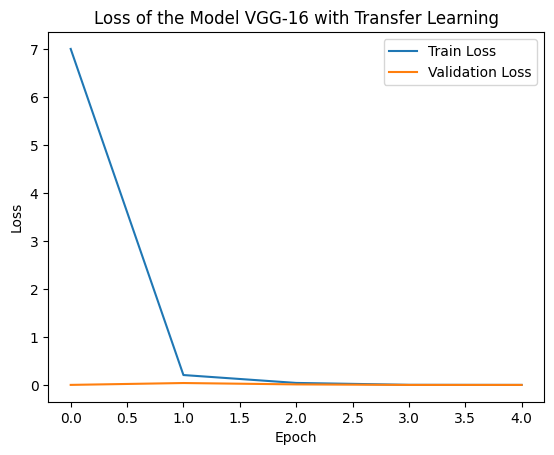

In [85]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-16 with Transfer Learning')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

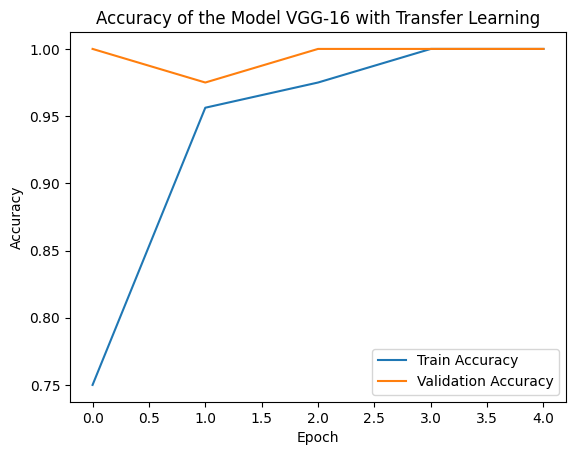

In [86]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-16 with Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [87]:
print("The Training Loss for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 16 with Transfer Learning
Epoch 1: 7.000959873199463
Epoch 2: 0.20603816211223602
Epoch 3: 0.04150865226984024
Epoch 4: 0.002102385275065899
Epoch 5: 2.7810270353256783e-07
The Validation Loss for the Model VGG 16 with Transfer Learning
Epoch 1: 0.0005909522296860814
Epoch 2: 0.0395408496260643
Epoch 3: 0.010868821293115616
Epoch 4: 3.948775338358246e-05
Epoch 5: 1.4059980912861647e-06
The Training Accuracy for the Model VGG 16 with Transfer Learning
Epoch 1: 0.75
Epoch 2: 0.956250011920929
Epoch 3: 0.9750000238418579
Epoch 4: 1.0
Epoch 5: 1.0
The Validation Accuracy for the Model VGG 16 with Transfer Learning
Epoch 1: 1.0
Epoch 2: 0.9750000238418579
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [88]:
# Evaluate the model on test data
test_loss, test_accuracy = transfer_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

40/40 [==============================] - 0s 12ms/step - loss: 1.4060e-06 - accuracy: 1.0000
Test loss: 0.0000, Test accuracy: 1.0000


In [90]:
test_generator1 = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=40,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


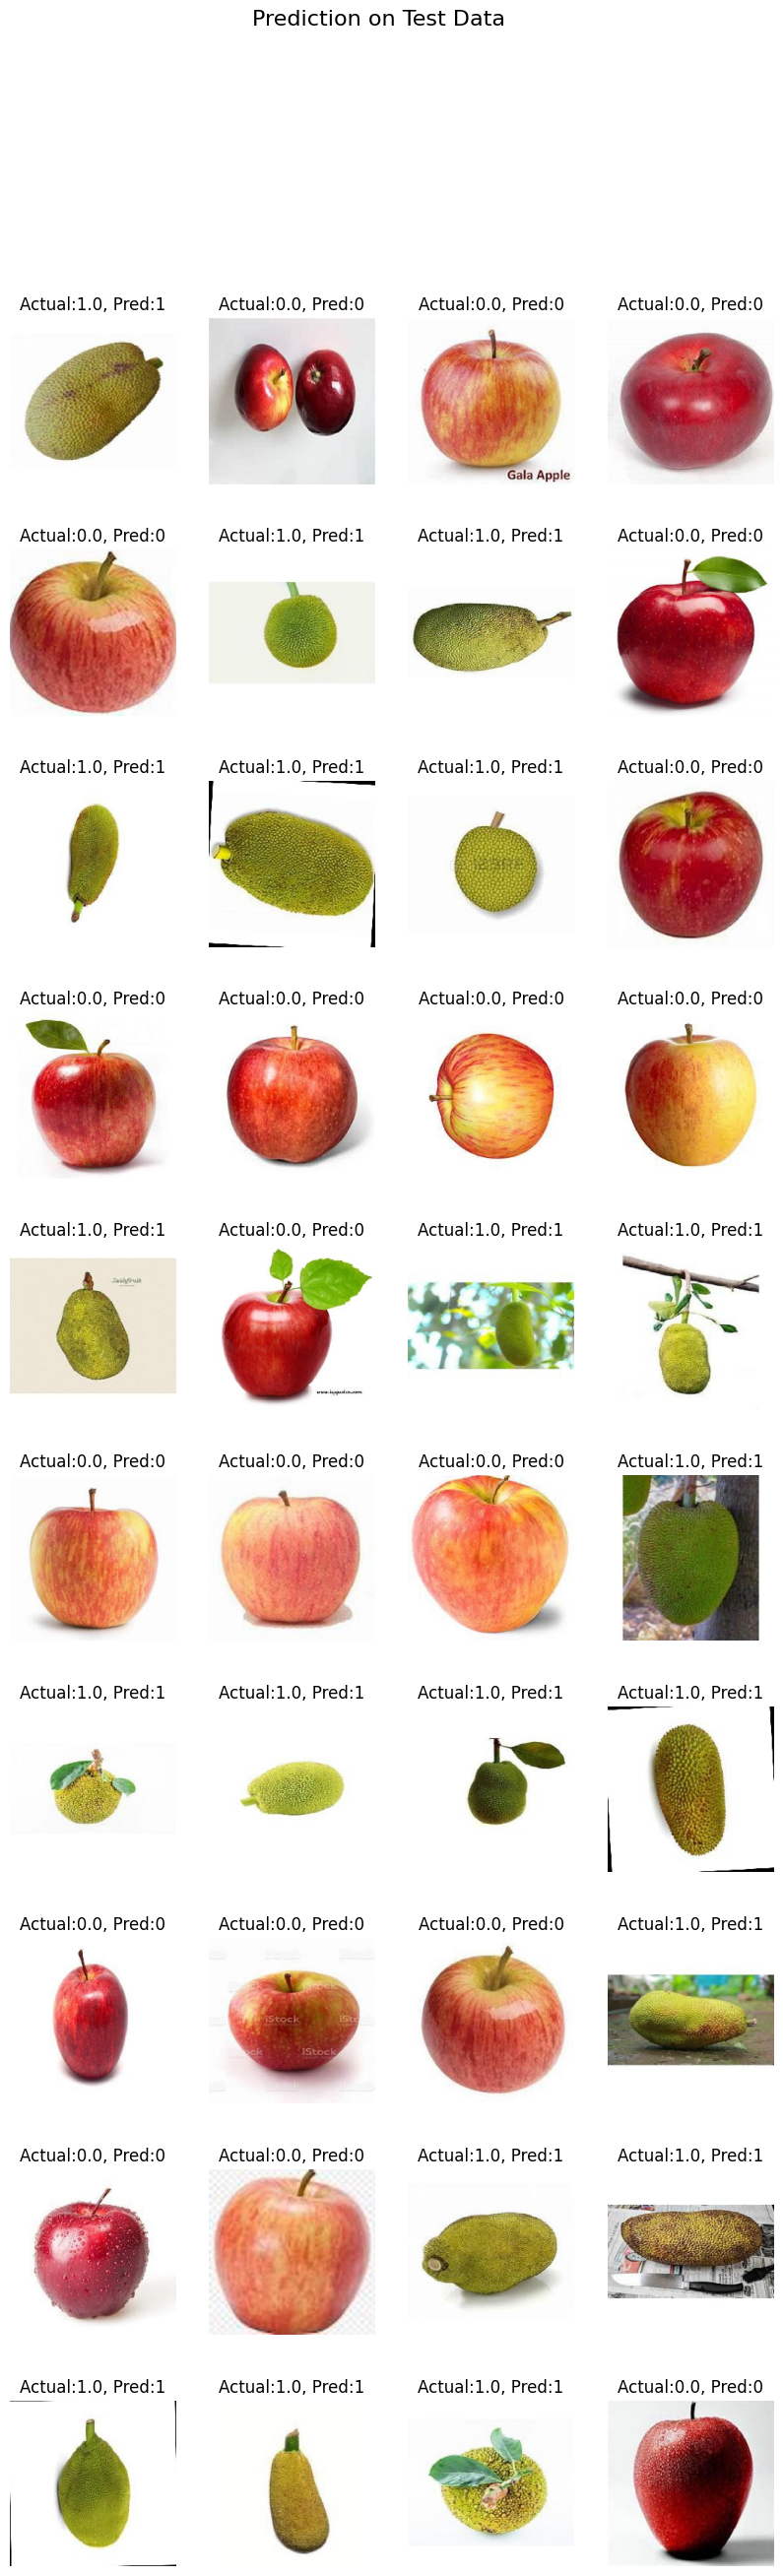

In [91]:
# Iterate through test data
imgctr = 0
for data, target in test_generator1:
    output = transfer_model(data)
    predicted_label = [1 if (op > 0.5) else 0 for op in output]  # Convert probability to binary prediction
    true_label = target

    # Convert tensor image to numpy array and reshape to (H, W, C)
    image = data.squeeze()
    fig, axarr = plt.subplots(10, 4, figsize=(10, 30))
    fig.suptitle("Prediction on Test Data", fontsize=16)

    for i in range(10):
      for j in range(4):
        axarr[i, j].imshow(image[i*4+j])
        axarr[i, j].set_title(f'Actual:{target[i*4+j]}, Pred:{predicted_label[i*4+j]}', fontsize=12)
        axarr[i, j].axis(False)

    plt.show()
    break